# EDA 탐색적 분석_1

In [134]:
#함수 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#한글 폰트 호출
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = './data/malgun.ttf' # For Windows
#font_location = 'C:/Windows/Fonts/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [60]:
#csv 파일 호출
df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv')
display(df.head(10))
df.info()

,년도,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
0,2014,강남구,37,13,3895,4394,512,525,8326,8851,1534,571509,5359,234324,576868,430,74,328,276,604
1,2014,강동구,10,5,2425,2804,148,153,5239,5392,1113,479586,4605,186239,484191,59,12,105,151,256
2,2014,강북구,21,6,1494,2320,189,195,3835,4030,1186,336363,3308,141139,339671,74,21,129,74,203
3,2014,강서구,9,8,2341,2717,214,222,5067,5289,907,576574,6331,230553,582906,230,39,169,114,283
4,2014,관악구,25,7,3029,3359,361,368,6413,6781,1270,515688,18120,248703,533809,487,91,100,228,328
5,2014,광진구,16,8,3167,2828,249,257,6011,6268,1651,365993,13493,159134,379486,87,22,89,19,108
6,2014,구로구,14,3,2377,2743,252,255,5134,5389,1179,427022,29736,172682,456758,187,40,100,40,140
7,2014,금천구,9,7,1552,2112,162,169,3673,3842,1488,239510,18669,104002,258180,101,39,84,60,144
8,2014,노원구,8,5,2404,2722,173,178,5134,5312,901,585599,3474,221580,589074,80,13,57,28,85
9,2014,도봉구,11,6,1350,1585,172,178,2946,3124,873,355829,2003,137382,357832,185,51,56,21,77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 20 columns):
년도            125 non-null int64
지역            125 non-null object
강도            125 non-null int64
살인            125 non-null int64
절도            125 non-null int64
폭력            125 non-null int64
강간강제추행        125 non-null int64
살인강간          125 non-null int64
강도절도폭력        125 non-null int64
범죄합계          125 non-null int64
10만명당범죄수      125 non-null int64
한국인           125 non-null int64
등록외국인         125 non-null int64
세대            125 non-null int64
인구합계          125 non-null int64
CCTV          125 non-null int64
10만명당CCTV수    125 non-null int64
단란주점          125 non-null int64
유흥주점          125 non-null int64
단란유흥          125 non-null int64
dtypes: int64(19), object(1)
memory usage: 19.7+ KB


In [61]:
#결측치 처리
#df['년도'].fillna(method='ffill' ,inplace=True)

#'년도'컬럼 형변환 - float->int->str
#df['년도'] = df['년도'].astype(int)

#서울지역 리스트 생성
seoul_area = list(set(df['지역']))

#피벗테이블로 변환
df = df.pivot_table(index=['지역','년도'])
#df.sortlevel(sort_remaining=False)
#print(df)
print(seoul_area)
display(df)

#조회
# for i in seoul_area:
#     print(i)
#     print(df.loc[(i)])

['중구', '은평구', '강동구', '동작구', '서대문구', '성동구', '종로구', '양천구', '용산구', '서초구', '노원구', '구로구', '중랑구', '금천구', '강서구', '관악구', '성북구', '광진구', '강북구', '마포구', '도봉구', '송파구', '강남구', '동대문구', '영등포구']


10만명당CCTV수  10만명당범죄수  CCTV  강간강제추행  강도  강도절도폭력  단란유흥  단란주점  등록외국인  \
지역  년도                                                                        
강남구 2014          74      1534   430     512  37    8326   604   328   5359   
    2015         167      1480   976     449  21    8155   582   313   5325   
    2016         302      1415  1741     516  39    7628   556   301   5084   
    2017         409      1362  2318     607  20    7106   520   287   4929   
    2018         501      1362  2766     600  14    6903   477   266   4978   
...              ...       ...   ...     ...  ..     ...   ...   ...    ...   
중랑구 2014         181      1264   770     163  14    5179   130   104   4551   
    2015         207      1233   872     187  11    4993   130   103   4646   
    2016         237      1208   993     164  14    4869   131   104   4701   
    2017         255      1103  1059     172   3    4394   130   104   4534   
    2018         260      1046  1068     174   3    4110   127   103   4778   

          범죄합계  살인  살인강간      세대  유흥주점    인구합계    절도    폭력     한국인  
지역  년도                                                              
강남구 2014  8851  13   525  234324   276  576868  3895  4394  571509  
    2015  8617  13   462  237556   269  582206  3850  4284  576881  
    2016  8149   5   521  235329   255  575597  3587  4002  570512  
    2017  7720   7   614  233311   233  566427  3130  3956  561497  
    2018  7513  10   610  229509   211  551615  3004  3885  546637  
...        ...  ..   ...     ...   ...     ...   ...   ...     ...  
중랑구 2014  5353  11   174  176247    26  423284  2390  2775  418733  
    2015  5193  13   200  176692    27  421048  2135  2847  416402  
    2016  5041   8   172  177114    27  417259  1691  3164  412558  
    2017  4571   5   177  178466    26  414155  1533  2858  409620  
    2018  4288   4   178  179961    24  409763  1526  2581  404985  

[125 rows x 18 columns]

In [62]:
df.loc['강남구']

,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
년도,,,,,,,,,,,,,,,,,,
2014,74,1534,430,512,37,8326,604,328,5359,8851,13,525,234324,276,576868,3895,4394,571509
2015,167,1480,976,449,21,8155,582,313,5325,8617,13,462,237556,269,582206,3850,4284,576881
2016,302,1415,1741,516,39,7628,556,301,5084,8149,5,521,235329,255,575597,3587,4002,570512
2017,409,1362,2318,607,20,7106,520,287,4929,7720,7,614,233311,233,566427,3130,3956,561497
2018,501,1362,2766,600,14,6903,477,266,4978,7513,10,610,229509,211,551615,3004,3885,546637


In [63]:
#자치구 별로 csv파일로 추출
for i in seoul_area:
    df.loc[(i)].to_csv('./seoul/'+i+'.csv',encoding='cp949')

## 1.강남구 분석

In [64]:
gdf = pd.read_csv('./seoul/강남구.csv', encoding='cp949',index_col='년도')
idf = pd.read_csv('./seoul/강남구.csv', encoding='cp949')

gdf.columns

Index(['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강간강제추행', '강도', '강도절도폭력', '단란유흥',
       '단란주점', '등록외국인', '범죄합계', '살인', '살인강간', '세대', '유흥주점', '인구합계', '절도', '폭력',
       '한국인'],
      dtype='object')

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


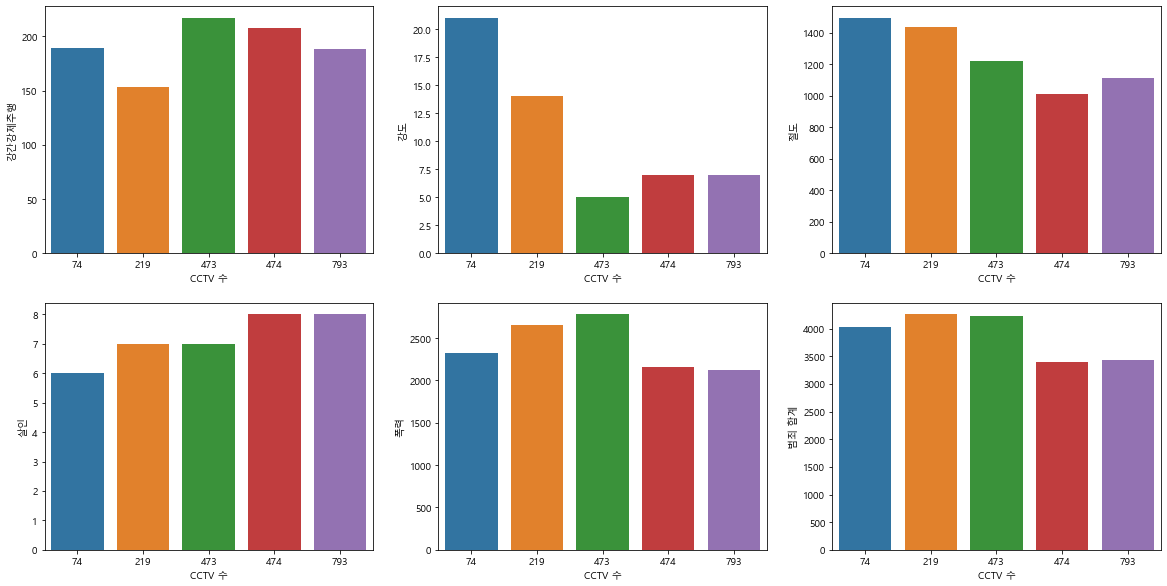

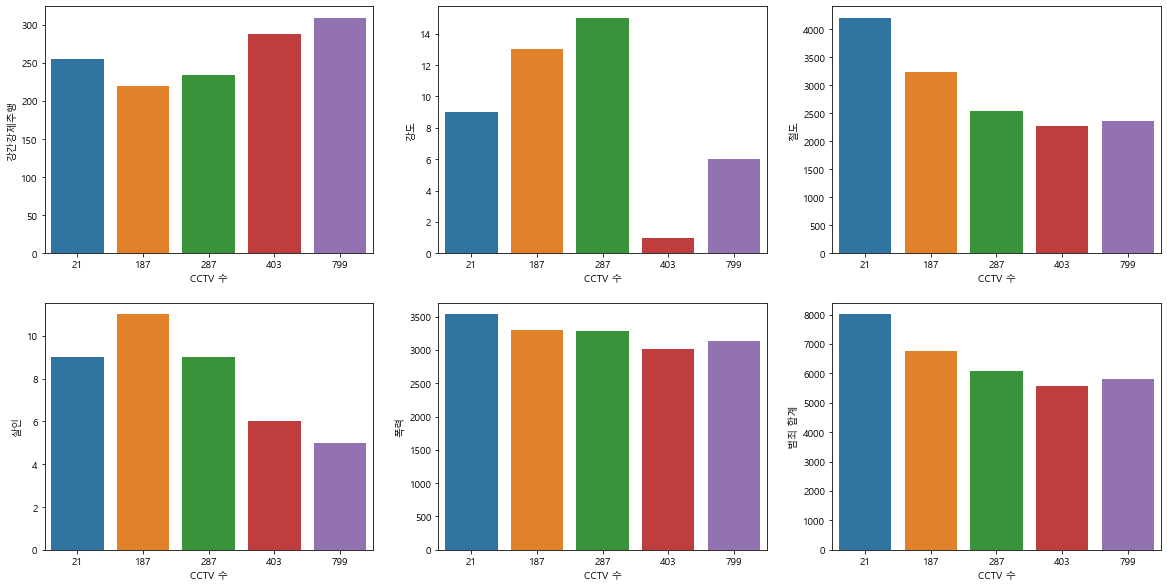

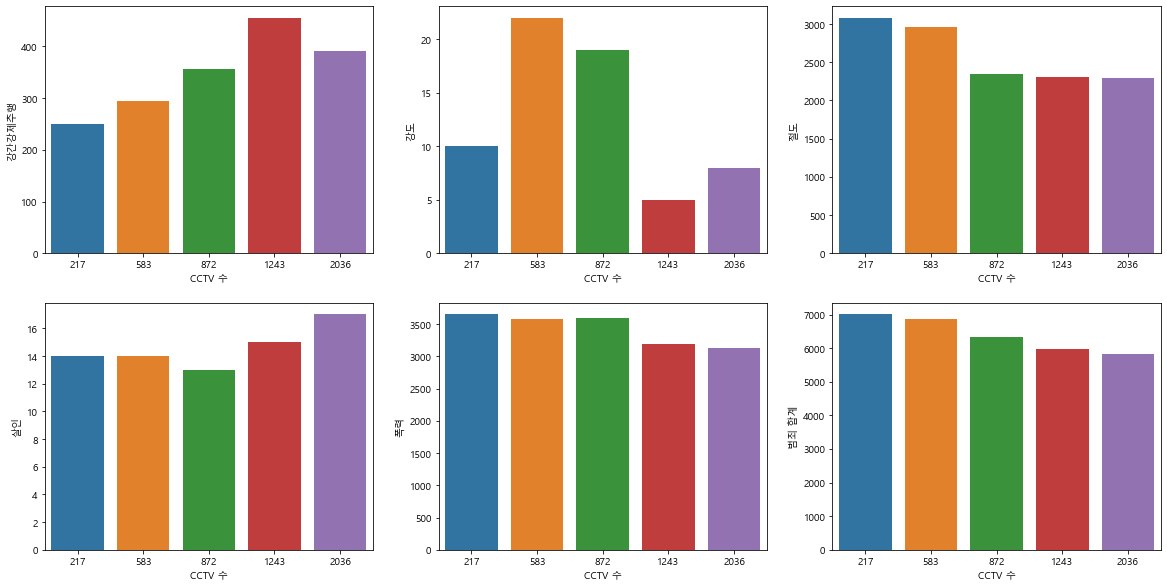

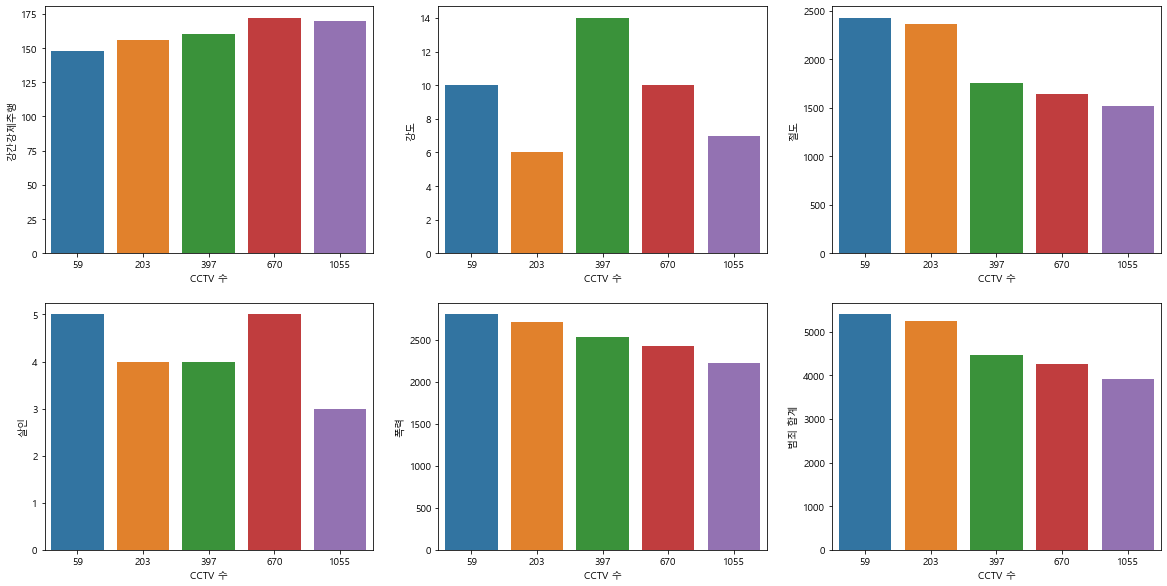

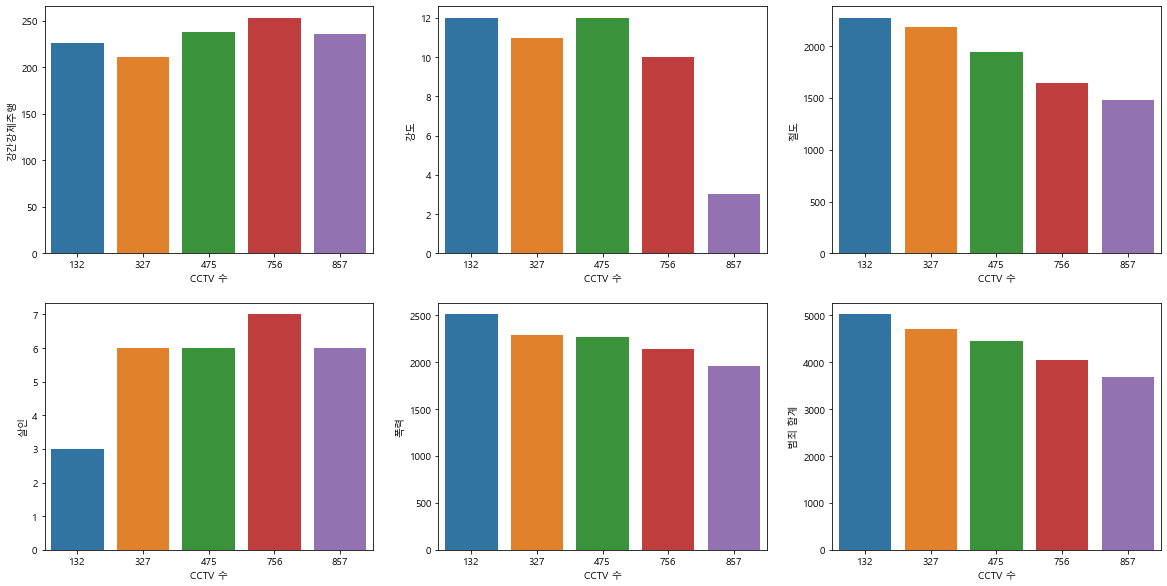

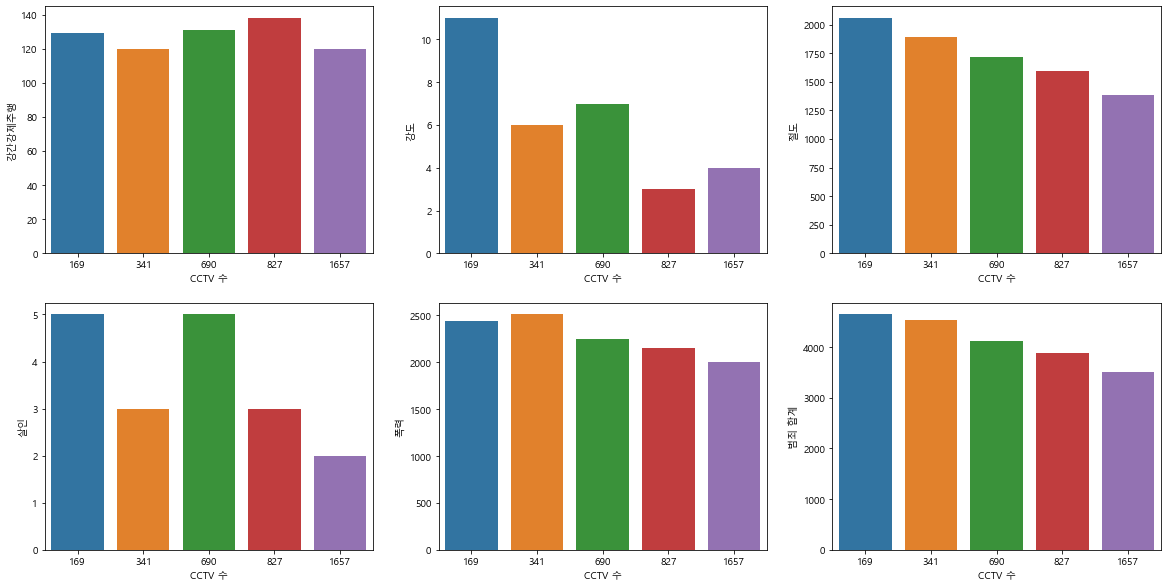

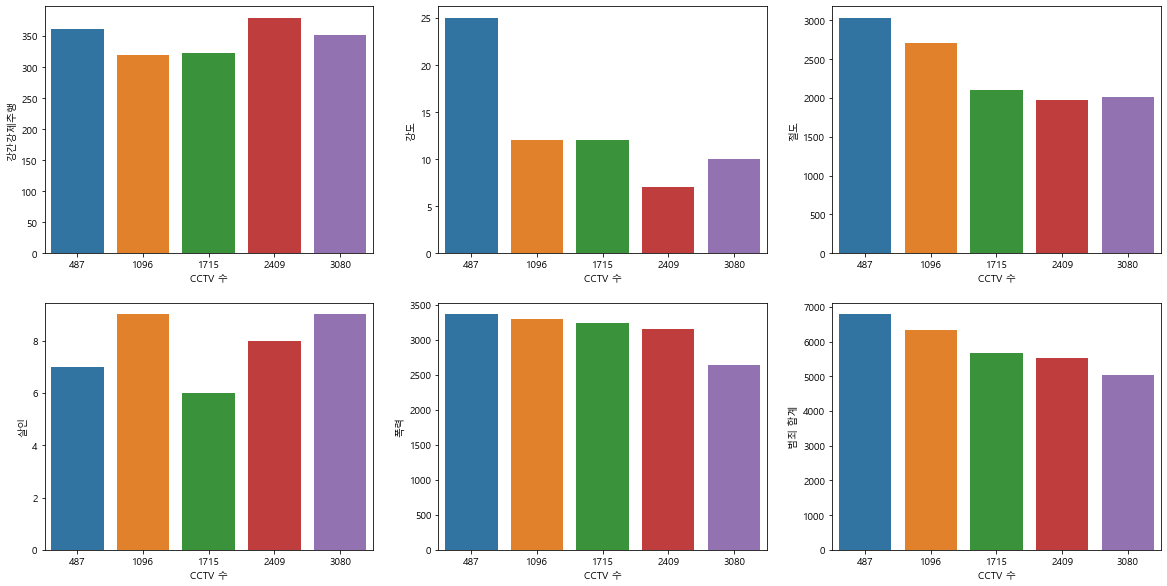

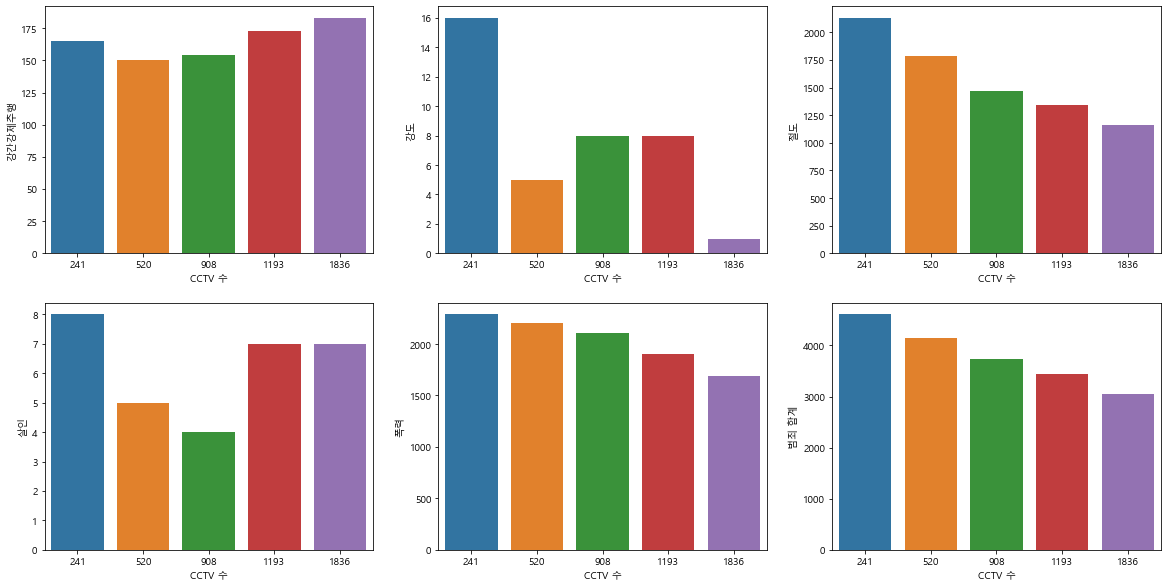

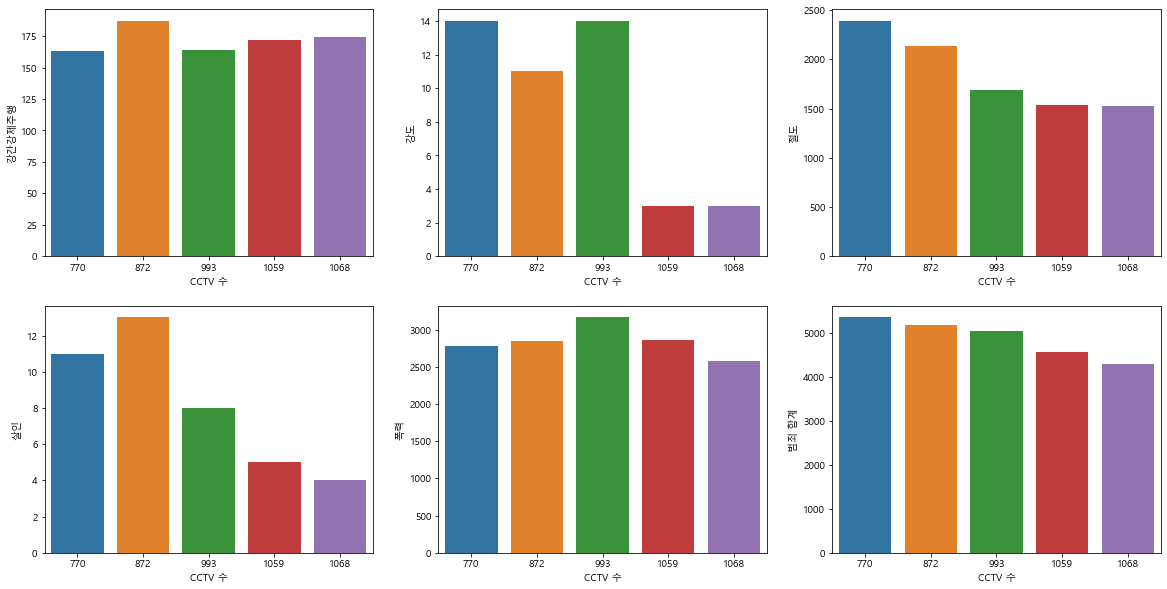

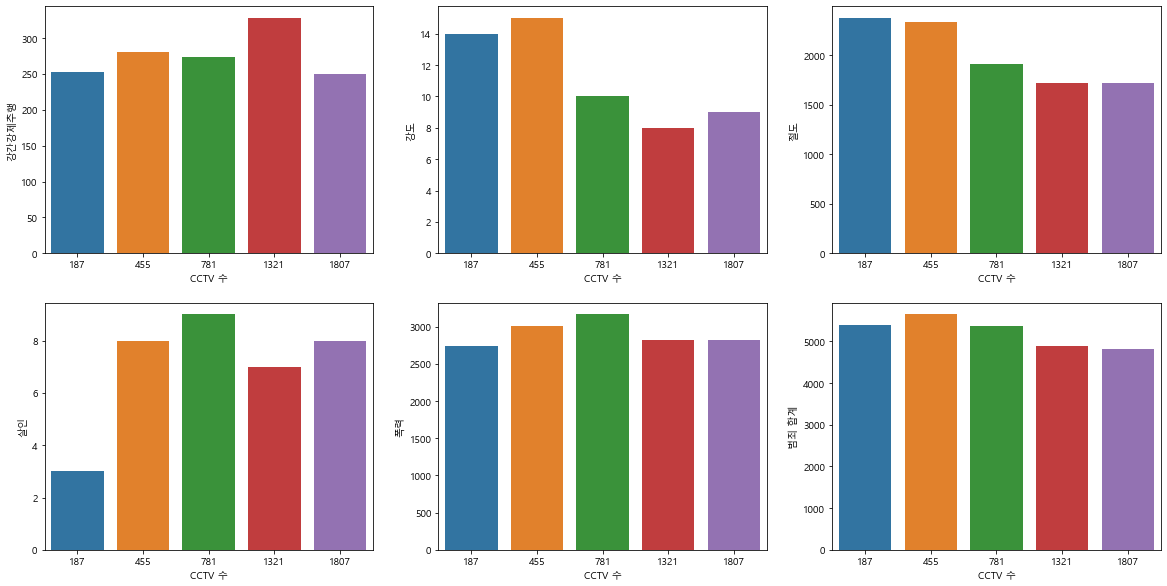

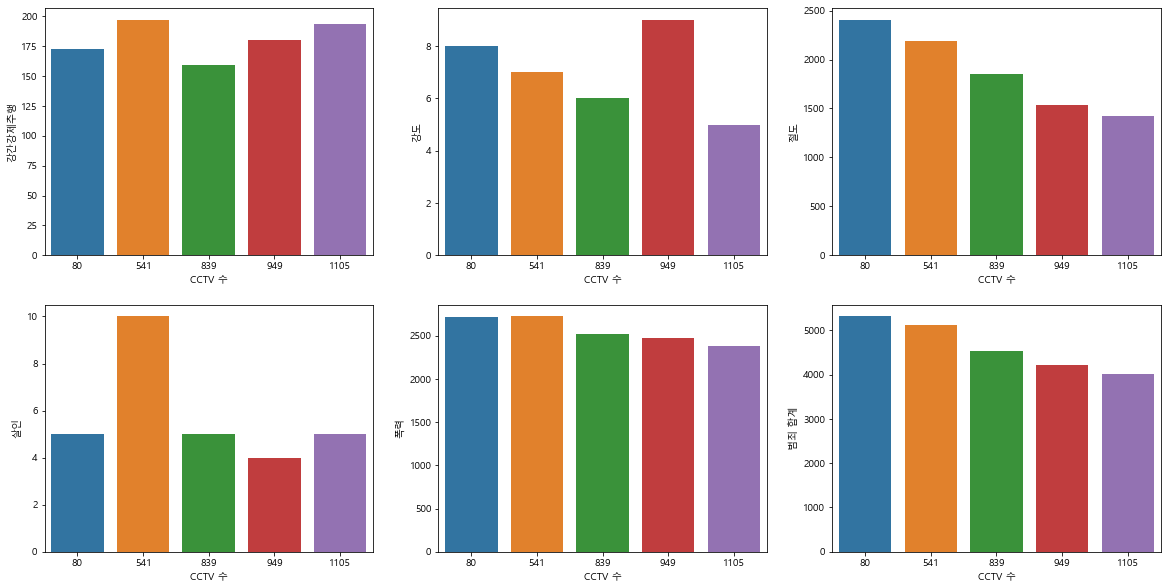

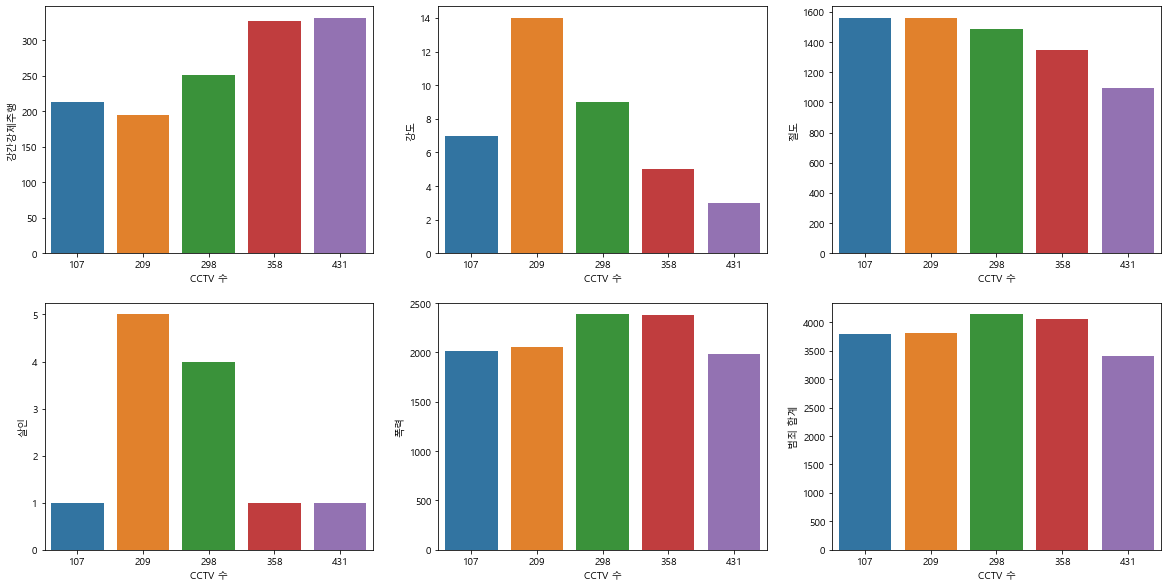

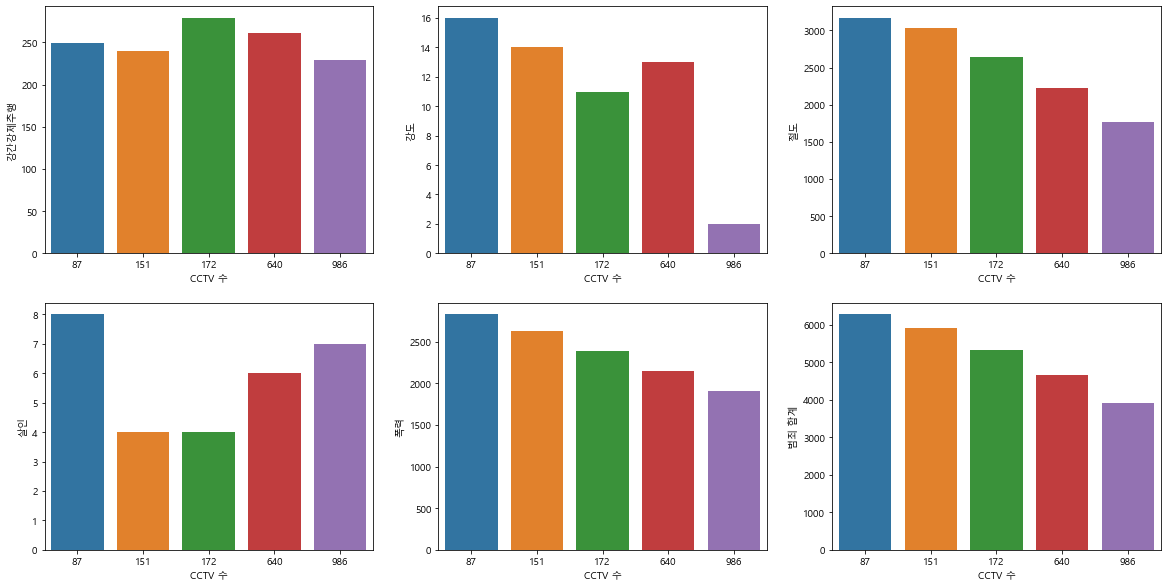

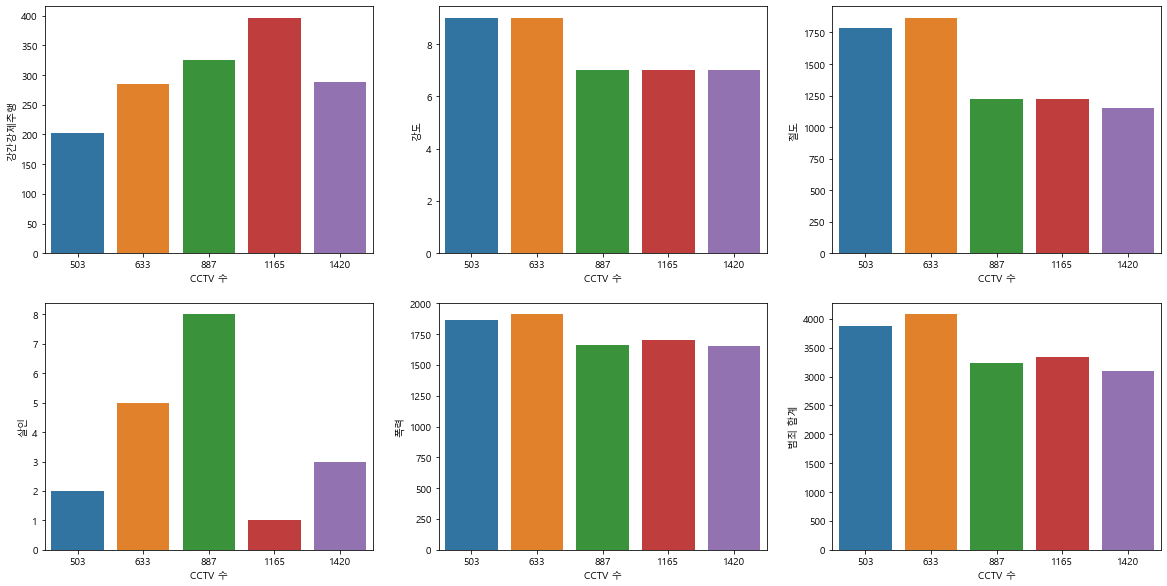

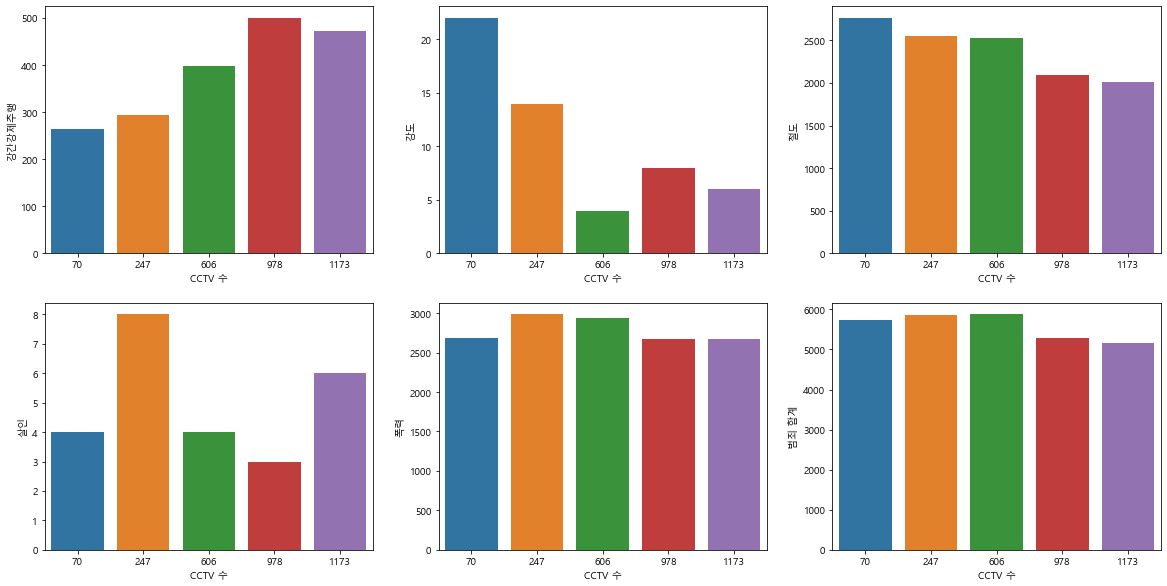

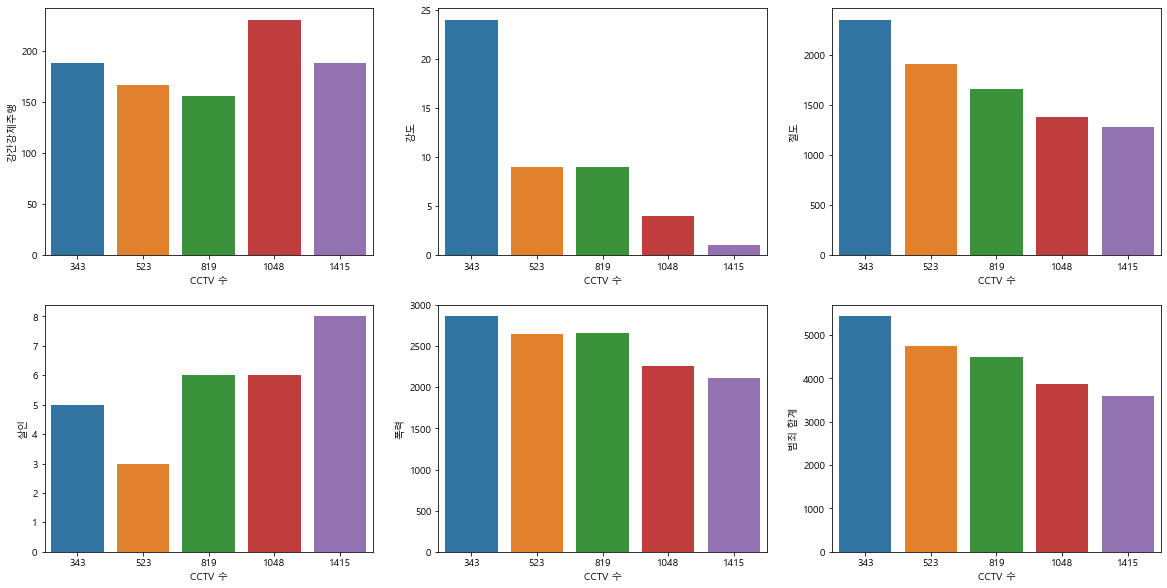

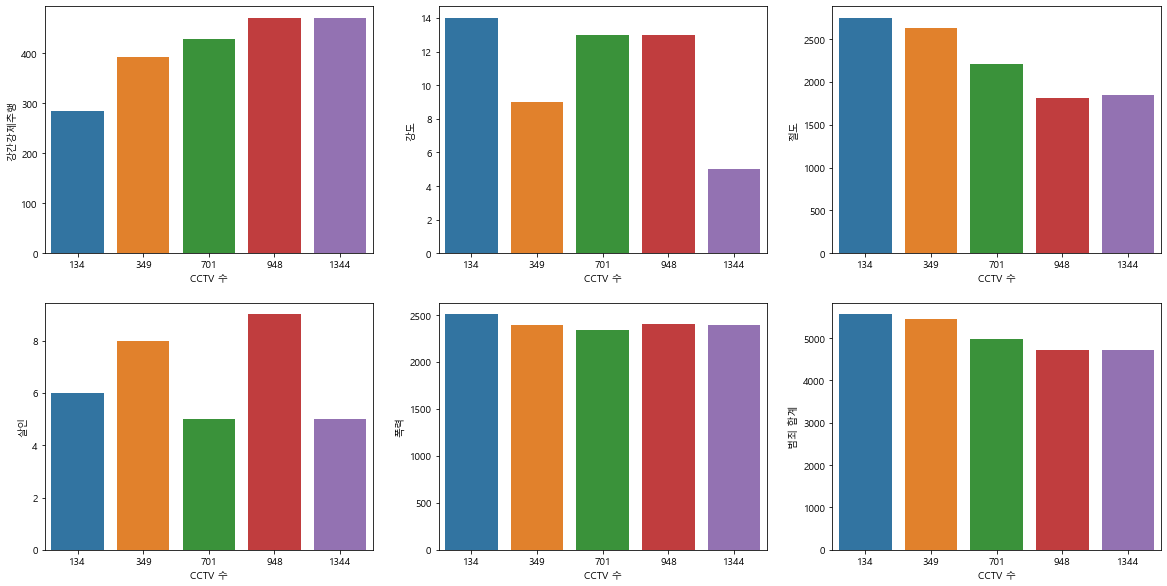

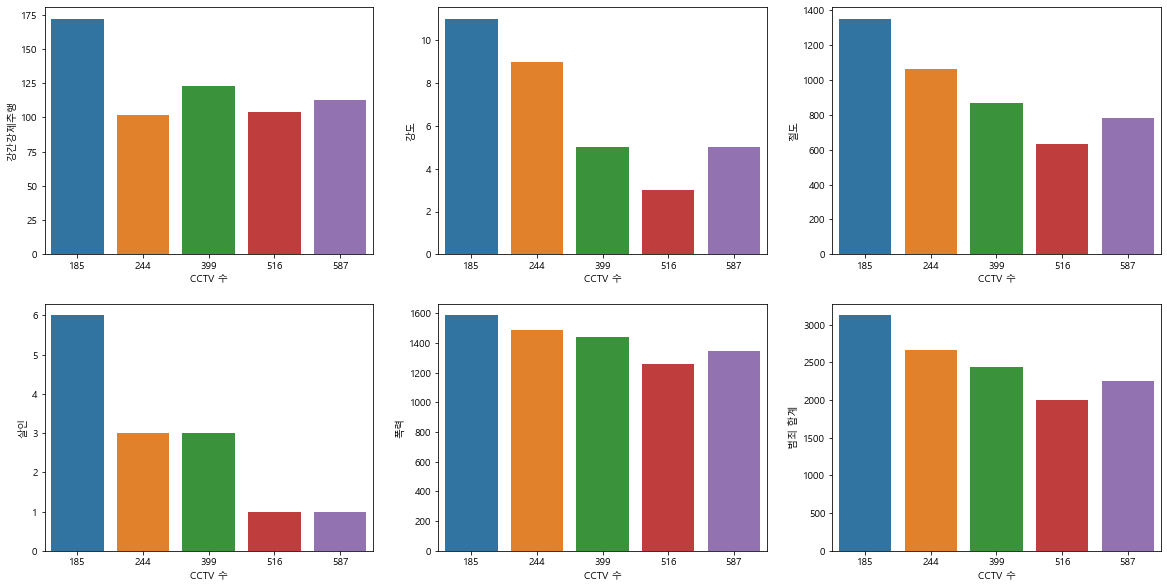

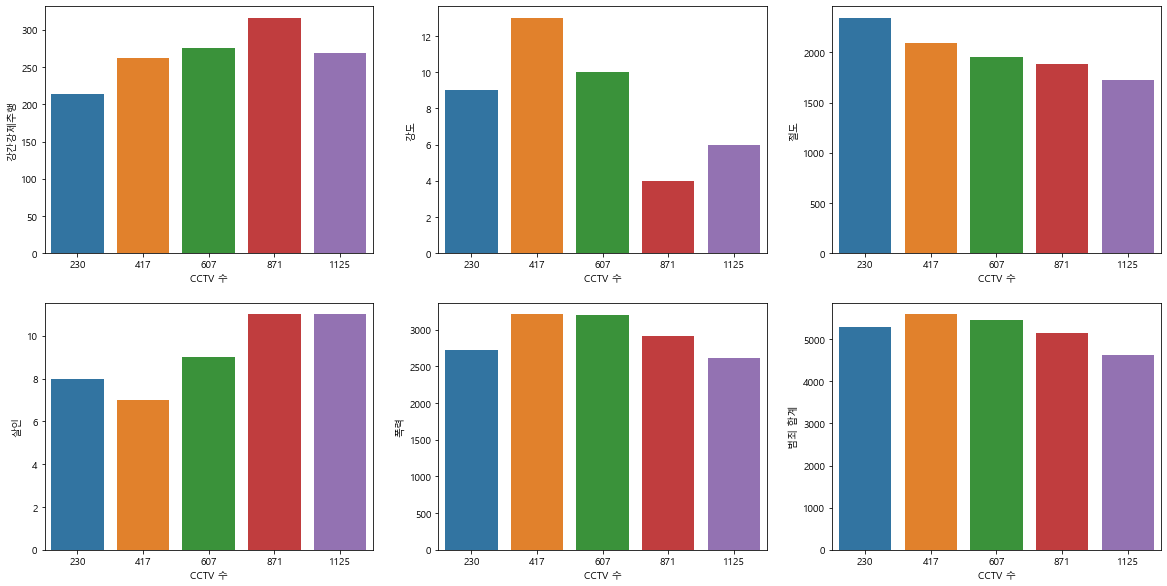

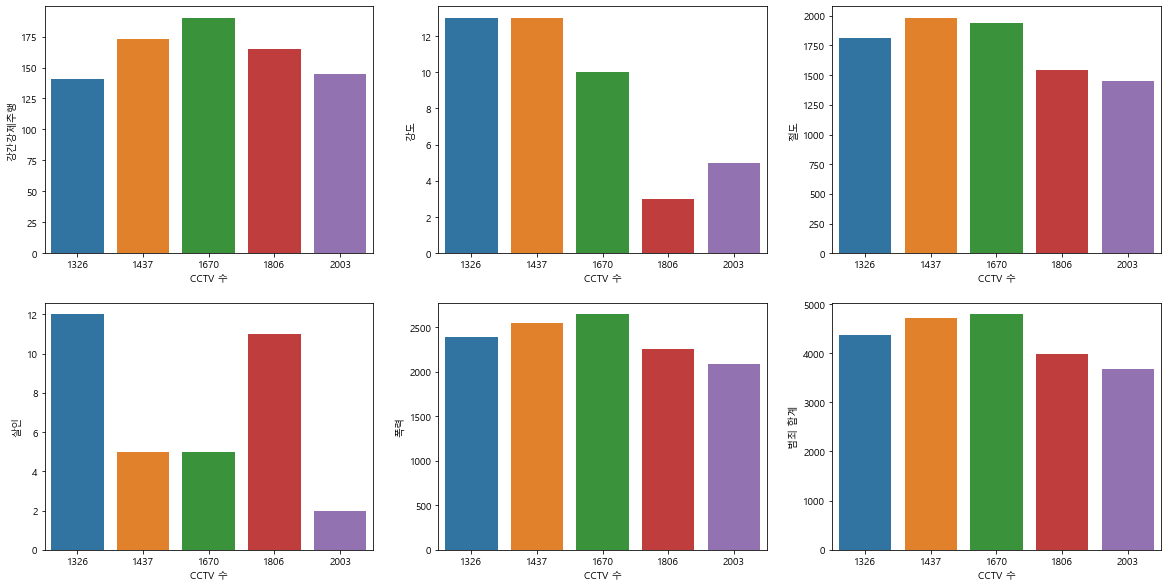

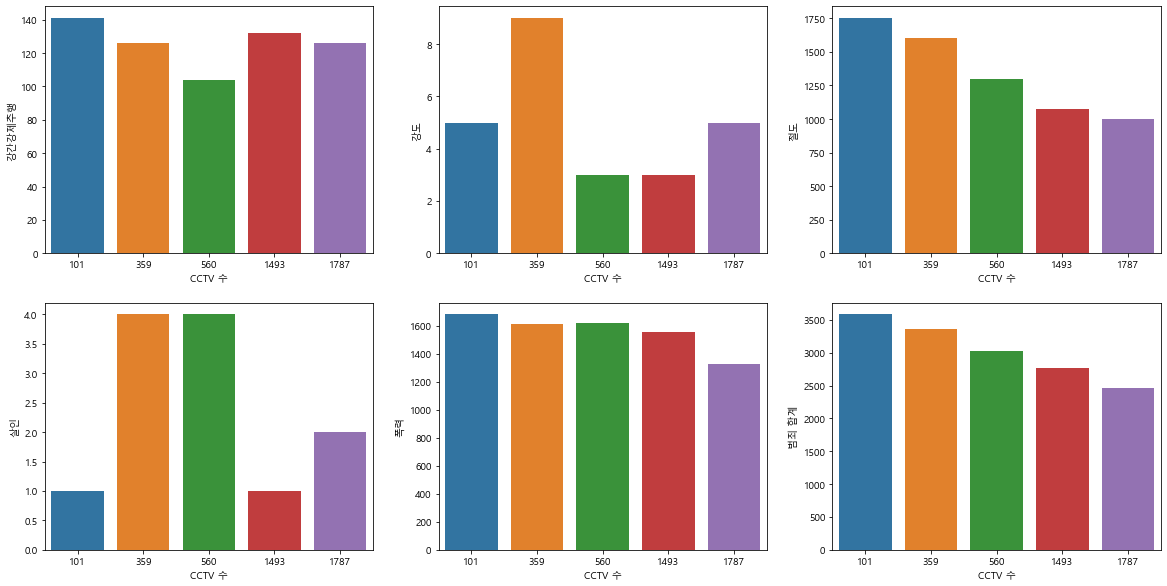

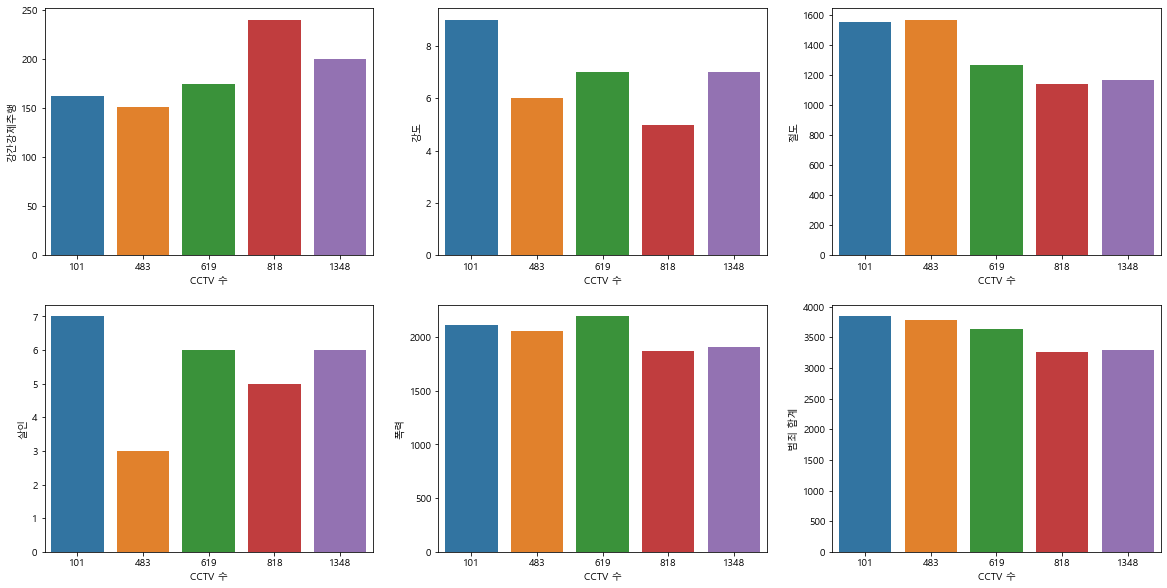

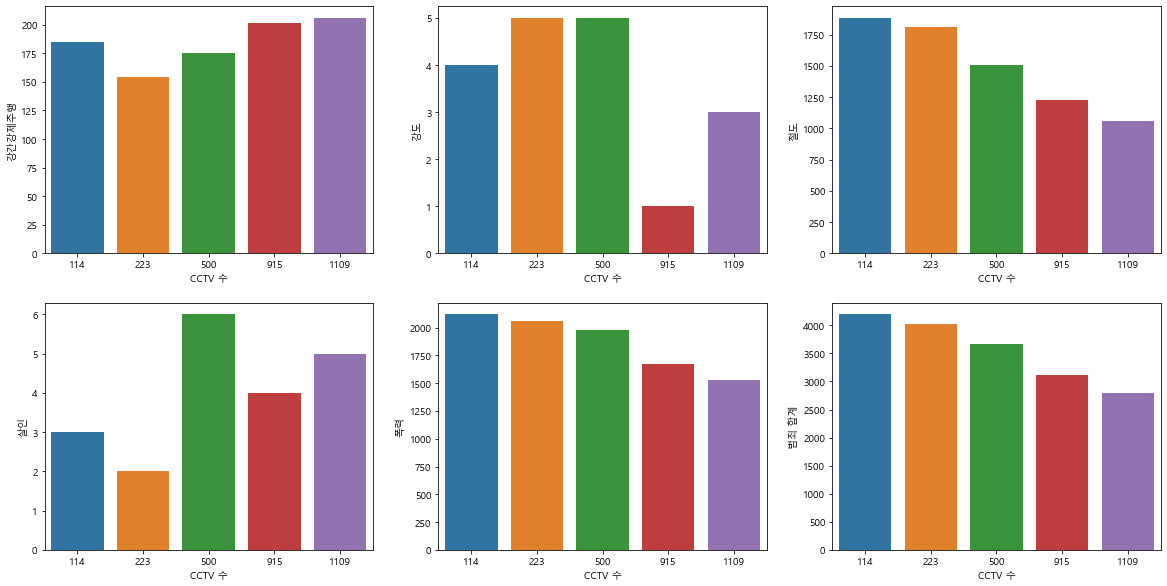

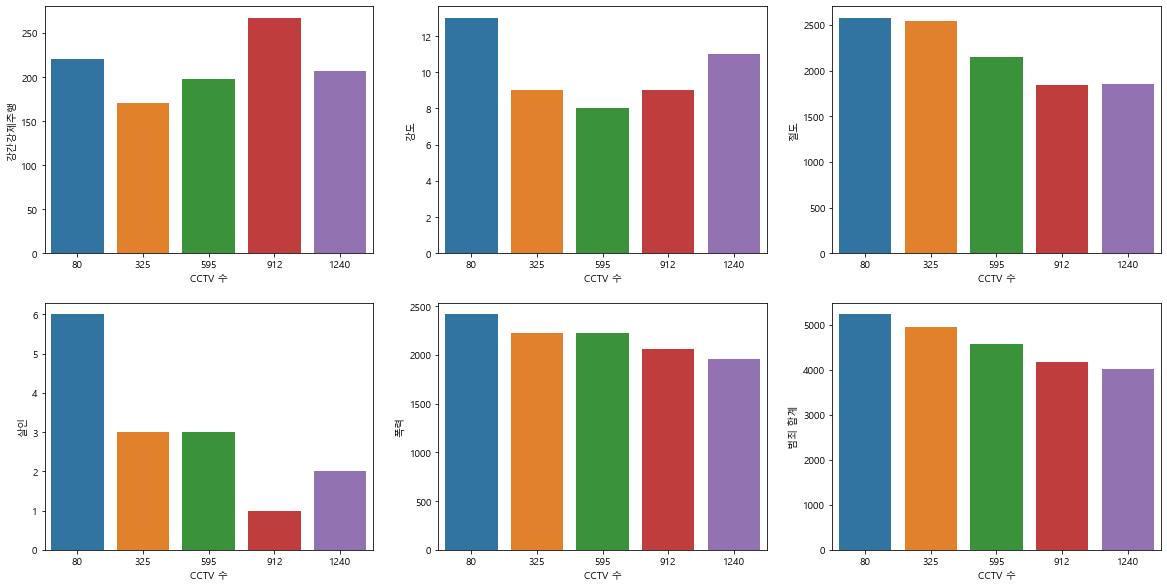

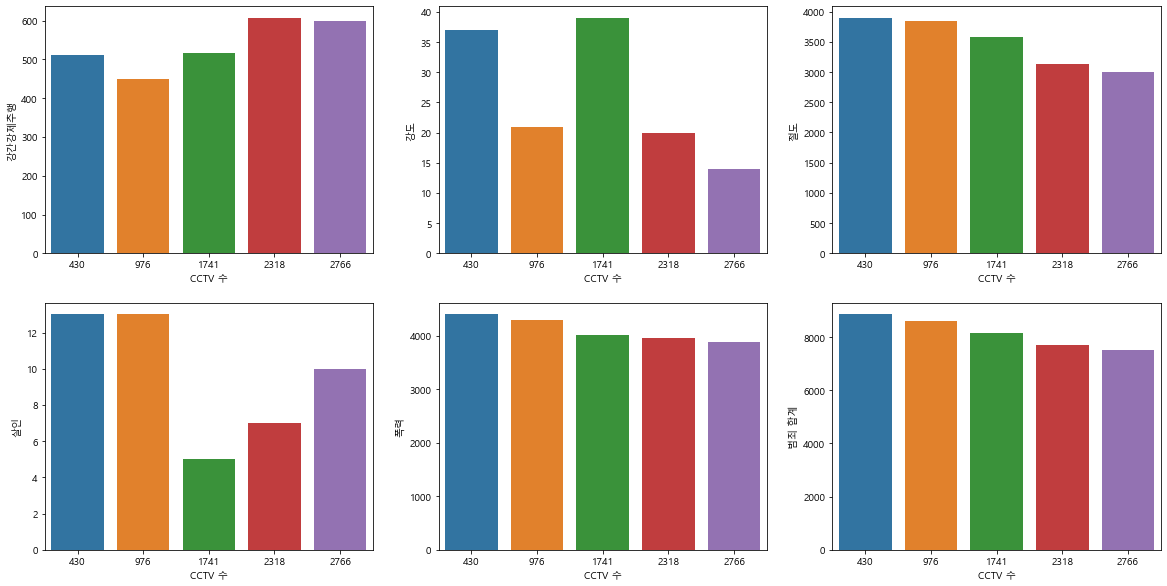

In [17]:
#구별로 그래프한거 추출
for i in seoul_area:
    #csv 파일 호출
    gdf = pd.read_csv('./seoul/'+i+'.csv', encoding='cp949',index_col='년도')
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2)
    ax3 = fig.add_subplot(2, 3, 3)
    ax4 = fig.add_subplot(2, 3, 4)
    ax5 = fig.add_subplot(2, 3, 5)
    ax6 = fig.add_subplot(2, 3, 6)


    sns.barplot(x='CCTV 수', y='강간강제추행', data=gdf, ax= ax1)
    sns.barplot(x='CCTV 수', y='강도', data=gdf, ax= ax2)
    sns.barplot(x='CCTV 수', y='절도', data=gdf, ax= ax3)
    sns.barplot(x='CCTV 수', y='살인', data=gdf, ax= ax4)
    sns.barplot(x='CCTV 수', y='폭력', data=gdf, ax= ax5)
    sns.barplot(x='CCTV 수', y='범죄 합계', data=gdf, ax= ax6)

    plt.savefig('./seoul_pic/'+i+'.png')
    
    

In [26]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
년도        5 non-null float64
자치구       125 non-null object
CCTV 수    125 non-null int64
세대        125 non-null int64
인구 합계     125 non-null int64
한국인       125 non-null int64
등록외국인     125 non-null int64
범죄 합계     125 non-null int64
살인        125 non-null int64
강도        125 non-null int64
강간강제추행    125 non-null int64
절도        125 non-null int64
폭력        125 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 12.8+ KB


In [5]:
#crime_kind = gdf[['강간강제추행', '강도', '살인', '절도', '폭력']]
#g = sns.pairplot(ddf, hue='자치구' )

In [64]:
df_corr = df[['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강간강제추행', '강도','강도절도폭력', '단란유흥', '단란주점',
     '등록외국인', '범죄합계', '살인','살인강간', '세대', '유흥주점', '인구합계', '절도', '폭력', '한국인']].corr()
df_corr.loc['범죄합계' , ]

10만명당CCTV수   -0.195298
10만명당범죄수      0.200234
CCTV          0.008903
강간강제추행        0.625376
강도            0.664287
강도절도폭력        0.997687
단란유흥          0.711849
단란주점          0.750961
등록외국인         0.197381
범죄합계          1.000000
살인            0.561277
살인강간          0.635455
세대            0.516137
유흥주점          0.555542
인구합계          0.502574
절도            0.947480
폭력            0.948324
한국인           0.484447
Name: 범죄합계, dtype: float64

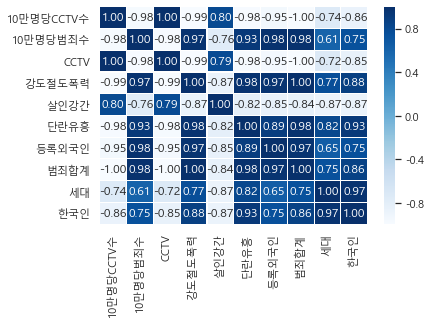

In [141]:
ddf_2018_corr  = ddf_2018[['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강도절도폭력','살인강간' , '단란유흥',
     '등록외국인', '범죄합계', '세대', '한국인']].corr()
hm = sns.heatmap(data = ddf_2018_corr, annot=True, 
fmt = '.2f', linewidths=.1, cmap='Blues')
hm.set_ylim(10.0,0.0)
plt.savefig('./data/seoul_강남구_corr_pic.png')

In [142]:
ddf_2018_corr['범죄합계']

10만명당CCTV수   -0.997009
10만명당범죄수      0.981234
CCTV         -0.996909
강도절도폭력        0.998399
살인강간         -0.838442
단란유흥          0.977826
등록외국인         0.965407
범죄합계          1.000000
세대            0.746435
한국인           0.861042
Name: 범죄합계, dtype: float64

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


(18.0, 0.0)

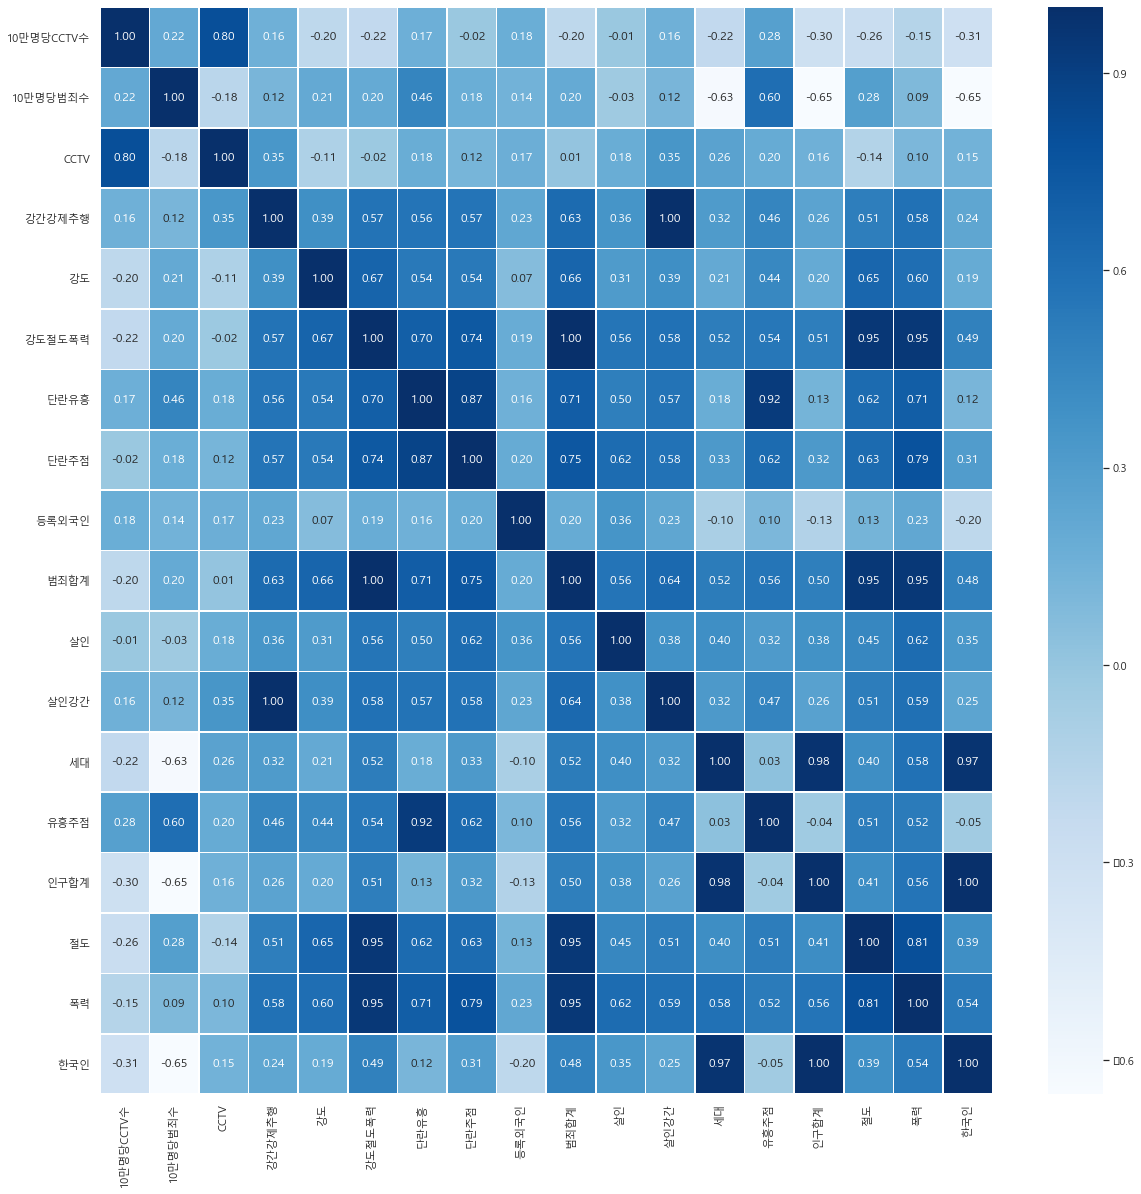

In [65]:
plt.figure(figsize=(20,20))
hm = sns.heatmap(data = df_corr, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
hm.set_ylim(18.0,0.0)

### 각 컬럼별 지역순위

In [146]:
ddf = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', encoding='utf-8')
#ddf_2018 = ddf[ddf['지역']=='강남구']
ddf = ddf[ddf['년도'] == 2018]

In [148]:
#인구합계
display(ddf[['지역','인구합계']].sort_values(by=['인구합계'], axis=0, ascending=False).head(5))

#CCTV
display(ddf[['지역','CCTV']].sort_values(by=['CCTV'], axis=0, ascending=False).head(5))

#범죄 합
display(ddf[['지역','범죄합계']].sort_values(by=['범죄합계'], axis=0, ascending=False).head(5))

#살인강간
display(ddf[['지역','살인강간']].sort_values(by=['살인강간'], axis=0, ascending=False).head(5))

#강절폭
display(ddf[['지역','강도절도폭력']].sort_values(by=['강도절도폭력'], axis=0, ascending=False).head(5))

#등록외국인수
display(ddf[['지역','등록외국인']].sort_values(by=['등록외국인'], axis=0, ascending=False).head(5))

#10만명당범죄수
display(ddf[['지역','10만명당범죄수']].sort_values(by=['10만명당범죄수'], axis=0, ascending=False).head(5))

#10만명당CCTV수
display(ddf[['지역','10만명당CCTV수']].sort_values(by=['10만명당CCTV수'], axis=0, ascending=False).head(5))

#단란유흥수
display(ddf[['지역','단란유흥']].sort_values(by=['단란유흥'], axis=0, ascending=False).head(5))

,지역,인구합계
117,송파구,673061
103,강서구,606005
108,노원구,552052
100,강남구,551615
104,관악구,521494


,지역,CCTV
104,관악구,3080
100,강남구,2766
119,영등포구,2036
110,동대문구,2003
116,성북구,1836


,지역,범죄합계
100,강남구,7513
119,영등포구,5840
117,송파구,5807
112,마포구,5172
104,관악구,5026


,지역,살인강간
100,강남구,610
112,마포구,479
114,서초구,475
119,영등포구,408
104,관악구,361


,지역,강도절도폭력
100,강남구,6903
117,송파구,5493
119,영등포구,5432
112,마포구,4693
104,관악구,4665


,지역,등록외국인
119,영등포구,35331
106,구로구,33044
107,금천구,19574
104,관악구,17892
110,동대문구,15777


,지역,10만명당범죄수
123,중구,2977
122,종로구,2256
119,영등포구,1445
120,용산구,1391
100,강남구,1362


,지역,10만명당CCTV수
123,중구,916
104,관악구,590
115,성동구,565
110,동대문구,548
107,금천구,532


,지역,단란유흥
100,강남구,477
119,영등포구,367
122,종로구,340
123,중구,325
104,관악구,305


In [78]:
ddf.head(5)

,년도,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
0,2014,1553,34779,6248,5462,343,125054,5189,2919,257047,130674,158,5620,4192293,2270,10381261,59393,65318,10124202
1,2015,3070,33838,11920,5449,276,120789,5073,2861,272617,126401,163,5612,4196408,2212,10336877,55307,65206,10064252
2,2016,4827,31982,18604,6002,262,111689,4923,2786,272481,117839,148,6150,4192351,2137,10246055,46857,64570,9973564
3,2017,6960,29373,26090,6963,169,100730,4888,2752,267181,107835,142,7105,4213216,2136,10164740,41162,59399,9897549
4,2018,9294,27822,34827,6412,143,95393,4680,2614,276991,101948,143,6555,4249252,2066,10079887,39175,56075,9802883


In [75]:
ddf = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', encoding='utf-8')

In [76]:
ddf = ddf.pivot_table(index=['년도'],aggfunc=np.sum)
ddf.reset_index(level='년도', inplace=True)

ddf

,년도,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
0,2014,1553,34779,6248,5462,343,125054,5189,2919,257047,130674,158,5620,4192293,2270,10381261,59393,65318,10124202
1,2015,3070,33838,11920,5449,276,120789,5073,2861,272617,126401,163,5612,4196408,2212,10336877,55307,65206,10064252
2,2016,4827,31982,18604,6002,262,111689,4923,2786,272481,117839,148,6150,4192351,2137,10246055,46857,64570,9973564
3,2017,6960,29373,26090,6963,169,100730,4888,2752,267181,107835,142,7105,4213216,2136,10164740,41162,59399,9897549
4,2018,9294,27822,34827,6412,143,95393,4680,2614,276991,101948,143,6555,4249252,2066,10079887,39175,56075,9802883


ValueError: Could not interpret input 'fff'

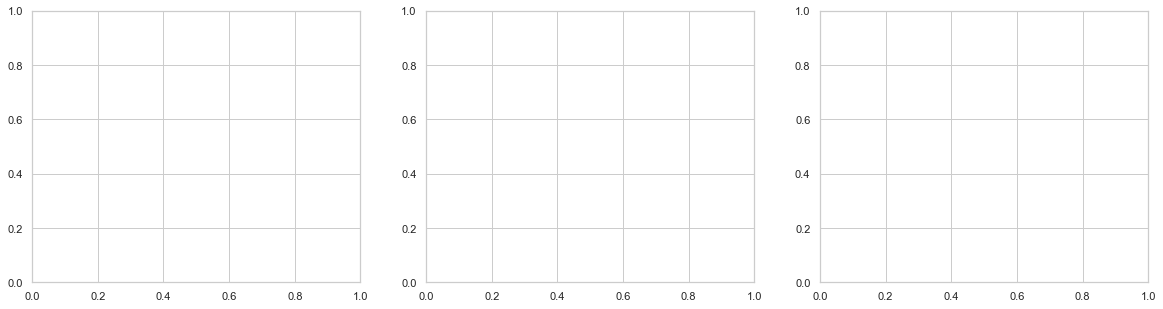

In [149]:
year_col = ['2014','2015','2016','2017','2018']

# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))
sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)
# sns.lineplot(x=year_col, data = ddf['10만명당범죄수'] , ax=ax1)
# sns.lineplot(x=year_col , y=ddf['10만명당CCTV수'] , palette="tab10", linewidth=2.5 , ax=ax1)
# sns.lineplot(x=year_col , y=ddf['10만명당범죄수'] , ax=ax1)



plt.show()
plt.close()

C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missin

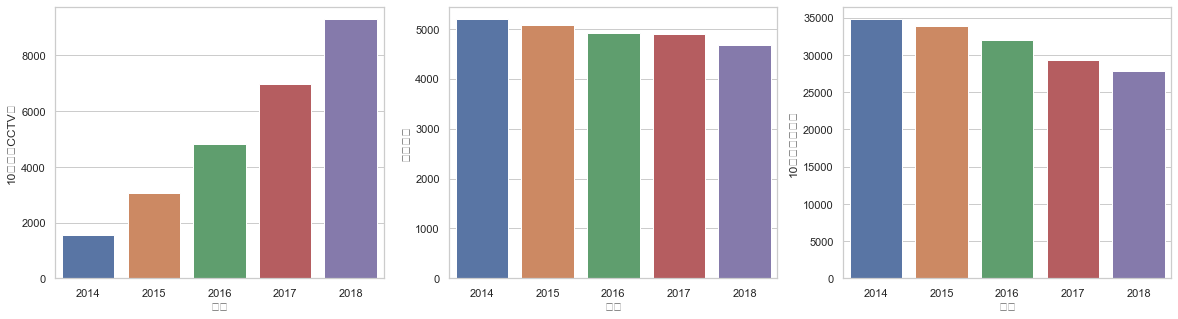

In [77]:
# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))
sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=ddf['년도'] , y=ddf['10만명당CCTV수'] , ax=ax1)
sns.barplot(x=ddf['년도'] , y=ddf['단란유흥'] , ax=ax2)
sns.barplot(x=ddf['년도'] , y=ddf['10만명당범죄수'] , ax=ax3)



plt.show()
plt.close()

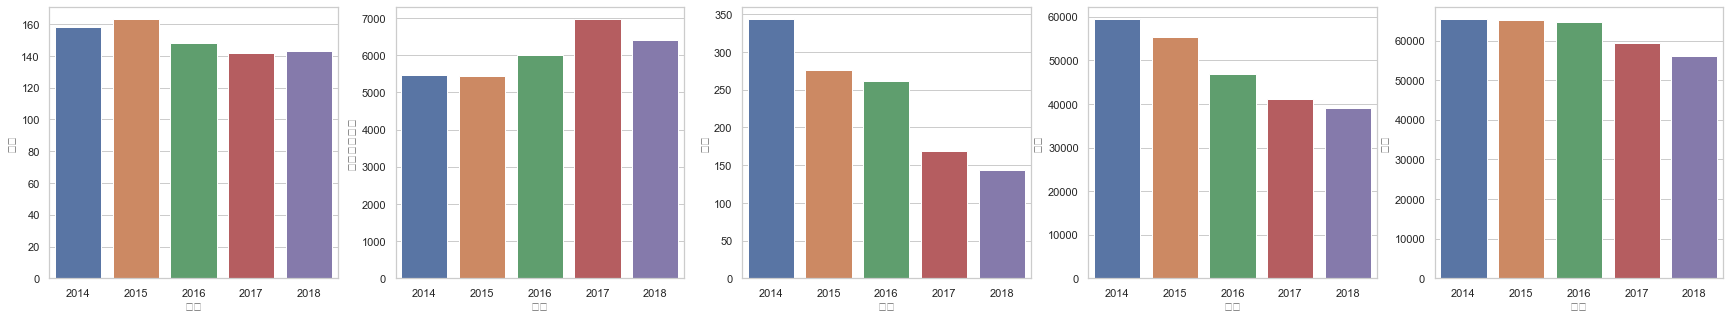

In [70]:
#5대 범죄
fig = plt.figure(figsize=(30,5))

sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=ddf['년도'] , y=ddf['살인'] , ax=ax1)
sns.barplot(x=ddf['년도'] , y=ddf['강간강제추행'] , ax=ax2)
sns.barplot(x=ddf['년도'] , y=ddf['강도'] , ax=ax3)
sns.barplot(x=ddf['년도'] , y=ddf['절도'] , ax=ax4)
sns.barplot(x=ddf['년도'] , y=ddf['폭력'] , ax=ax5)



plt.show()
plt.close()